Imports

In [156]:
import numpy as np
import sep
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from astropy.io import fits

Open and Display Photo

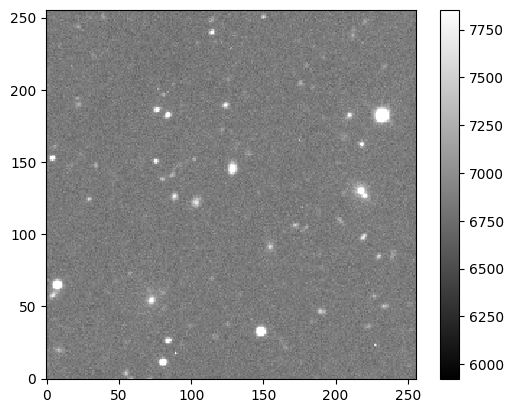

In [157]:
filename = './image.fits' #Establishing filepath
#fits.info(filename)
data = fits.getdata(filename, ext=0) #getting data from HDU 0 of the file
m, s = np.mean(data), np.std(data) #getting mean and standard deviation
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower') #showing image
plt.savefig('image.png')
plt.colorbar();

6852.04931640625
65.46174621582031


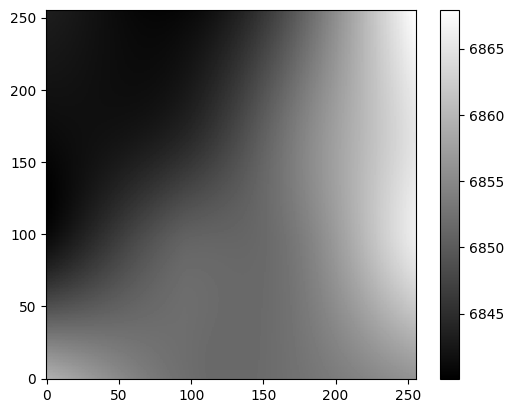

In [158]:
bkg = sep.Background(data) #grabbing background

print(bkg.globalback) #printing background average
print(bkg.globalrms) #printing background  

bimage = bkg.back()
plt.imshow(bimage, interpolation='nearest', cmap='gray', origin='lower') #Displaying background
plt.colorbar();
plt.savefig('imageBg.png')


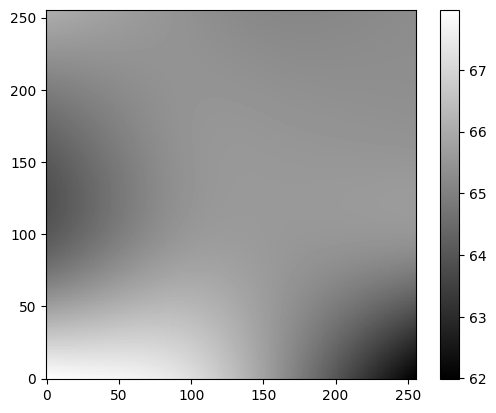

In [159]:
plt.imshow(bkg.rms(), interpolation='nearest', cmap='gray', origin='lower') #displaying background RMS
plt.colorbar();
plt.savefig('imageBgRMS.png')
nobk = data - bkg #subtracting background from data

Object Detection

69

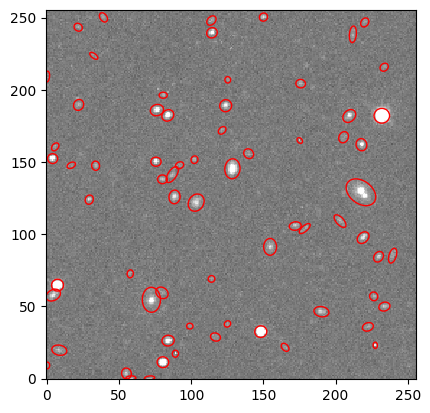

In [160]:
objects = sep.extract(nobk, 1.5, err=bkg.globalrms) #finding objects in no-background data
fig, ax = plt.subplots()
m, s = np.mean(nobk), np.std(nobk)
im = ax.imshow(nobk, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)): #for each object, plot a ellipse on top of it corresponding to the dimensions and orientation of the object
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('imageObjects.png')
len(objects) #number of objects found

Reading Fluxes

In [161]:
#reading fluxes of found objects
flux, fluxerr, flag = sep.sum_circle(nobk, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i])) #print the first the fluxes and error of the first 10 objects


object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
